# Pyfolio 安裝

目前pip install pyfolio，0.9.2 會有 packages 不相容的問題
假如您看到error，很有可能是此問題，
修復的方式，就是安裝更新版的 pyfolio：
1. 請先安裝git（才能下載最新版pyfolio）
    * Windows 請按此[下載安裝檔來安裝](https://git-scm.com/download/win)
    * Mac 請打開內建 terminal 輸入 brew install git
2. 請開啟任意 anaconda prompt 或 terminal 輸入：
    * conda activate finlab
    * pip install git+https://github.com/quantopian/pyfolio
    
並且重新開啟kernel，或是重開notebook
然後再執行以下程式，應該就可以通過囉！

# 0050 測試

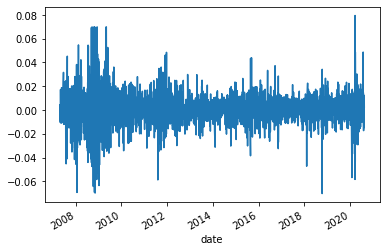

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 獲取0050收盤價資料
from finlab.data import Data
data = Data()
close = data.get_adj("收盤價")

# 將收盤假日期調整，這樣子等等使用pyfolio才不會有問題
close.index = close.index.tz_localize("Asia/Taipei")

# 每天報酬率繪圖
%matplotlib inline
close['0050'].pct_change().plot()

# 使用 Pyfolio 觀察個股報酬率

Start date,2007-04-23
End date,2020-08-14
Total months,156
,Backtest
Annual return,8.32%
Cumulative returns,183.878%
Annual volatility,20.193%
Sharpe ratio,0.50
Calmar ratio,0.15
Stability,0.83
Max drawdown,-55.753%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.75,2007-10-29,2008-11-20,2011-01-28,850
1,28.22,2020-01-14,2020-03-19,2020-07-13,130
2,23.01,2011-01-28,2011-12-19,2013-05-16,600
3,20.96,2015-04-27,2015-08-24,2016-08-08,336
4,17.53,2018-08-30,2019-01-04,2019-09-16,273


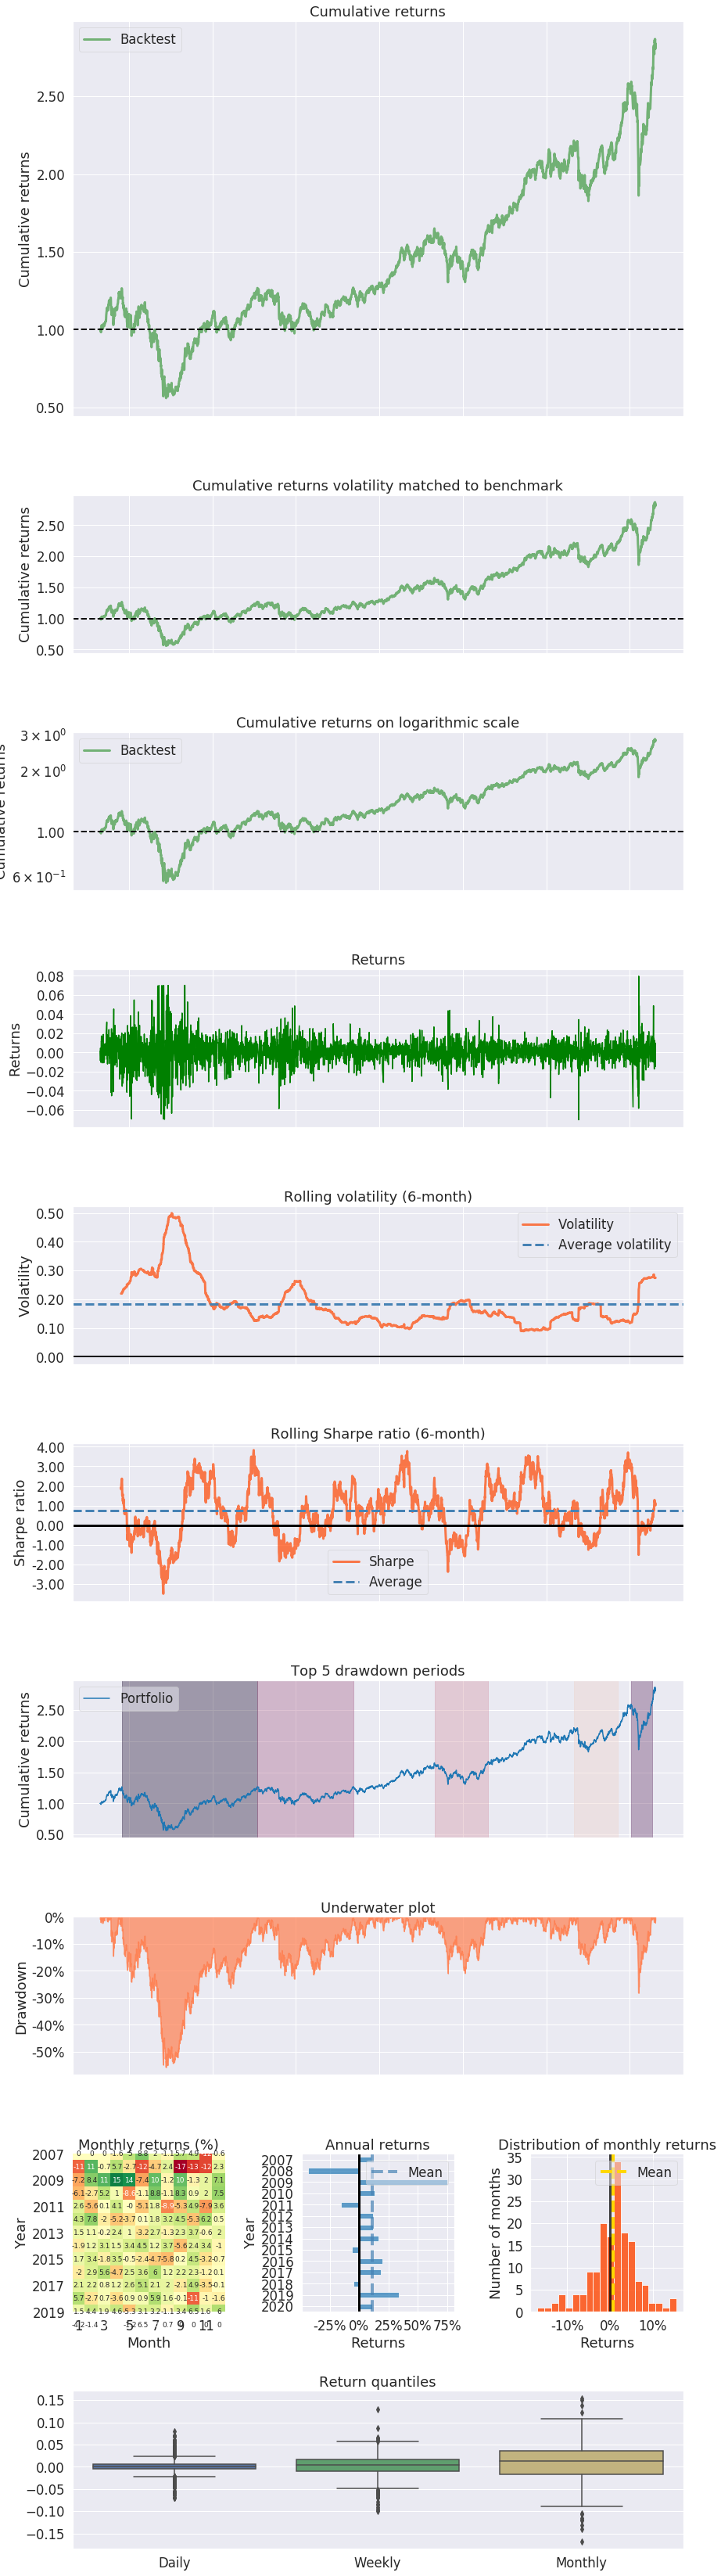

In [2]:
import pyfolio as pf

pf.create_returns_tear_sheet(close['0050'].pct_change())

In [ ]:
import pickle
import pandas as pd

# 得到 上一個單元的 回測結果
ret = pickle.load(open("return_history.pkl", "rb"))

# 將回測報酬率取出來
ret = ret.pct_change().dropna()
ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')

# 利用pyfolio 比較報酬率
pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())